# Kobe Bryant Shot Selection ML

Este é um projeto de Engenharia de Machine Learning e tem o objetivo de utilizar a base de dados kobe-bryant-shot-selection disponível no
site Kaggle, URL: https://www.kaggle.com/c/kobe-bryant-shot-selection/data. Essa base de dados trás informações como circustâncias e localização, entre outras,
dos arremessos realizados pelo astro da NBA Kobe Bryant durante sua carreira. A intenção é determinar através dos algoritmos de machine learning
de foi convertida a cesta, variável alvo shot_made_flag.

# 1. Repositório e Template

Este projeto possue o seguinte repositório de dados URL: https://github.com/eriktavares/KobeBryantShotSelectionML. As estruturas de diretórios de arquivos foram baseadas no padrão Framework TDSP da Microsoft, e foi baixo o template pela URL https://github.com/Azure/Azure-TDSP-ProjectTemplate. Somente a pasta Simple_Data foi renomeada para Data, por conta da descrição que foi solicitado no enunciado da atividade (moodle). O arquivo de dados foi renomeado para 

In [73]:
import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing, metrics, model_selection
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

Estrutura dos diretórios dentro do Repositório

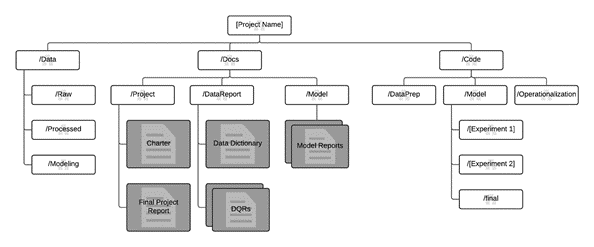

# 2. Diagrama MLOps

Para inicio do projeto de Machine Learning é preciso pensar nos processos necessários para a execução. Dessa forma, é preciso haver inicialmente um Entendimento de Negócio, está etapa é uma visão das atividades macro que envolve o projeto. Esse entendimento da origem a outras 3 atividades principais.

O Planejamento, onde será feito o diagrama pepiline do projeto, entre outros documentos, cronogramas, ferramentos de gestão e acompanhamento. Estrutura de repositórios de código, dados, etc. Ferramentas utilizadas para o desenvolvimento, frameworks, plataformas e etc.

Exploração de dados. os projetos de Machine Learning são baseados em informações, então, dessa forma dependendo do tamanho do projeto, pode ou não ser continua e deve fazer interface com planejamento e entendimento do negócio. E por ultimo abastecer uma base de dados com informações. No caso desse trabalho especifico, essa base é coletada do site kaggle.

Desenvolvimento do Experimento. Com os dados em mãos, é iniciado o processo experimental onde é realizada a modelagem. Esta etapa começa com a validações dos dados, pode ser feita por exemplo utilizando o Pycaret Setup. A preparação dos dados, onde neste trabalho são removidos os dados nulos, normalização, entre outros processos de tratamento. Treino e avaliação, caso os resultados não sejam coonforme esperado, processo de melhoria e otimização, e nova avaliação. Posteriormente o registro, versionamento e depployment do modelo. Claro que podem ocorrer versionamentos durante qualquer etapa desenvolvimento. Após o deployment o modelo entra em operação, e pode ser como uma API, código, serviço, entre outros. A operação é monitorada e pode gerar novos gatilhos de desenvolvimento e melhorias, retreinamentos, etc. 

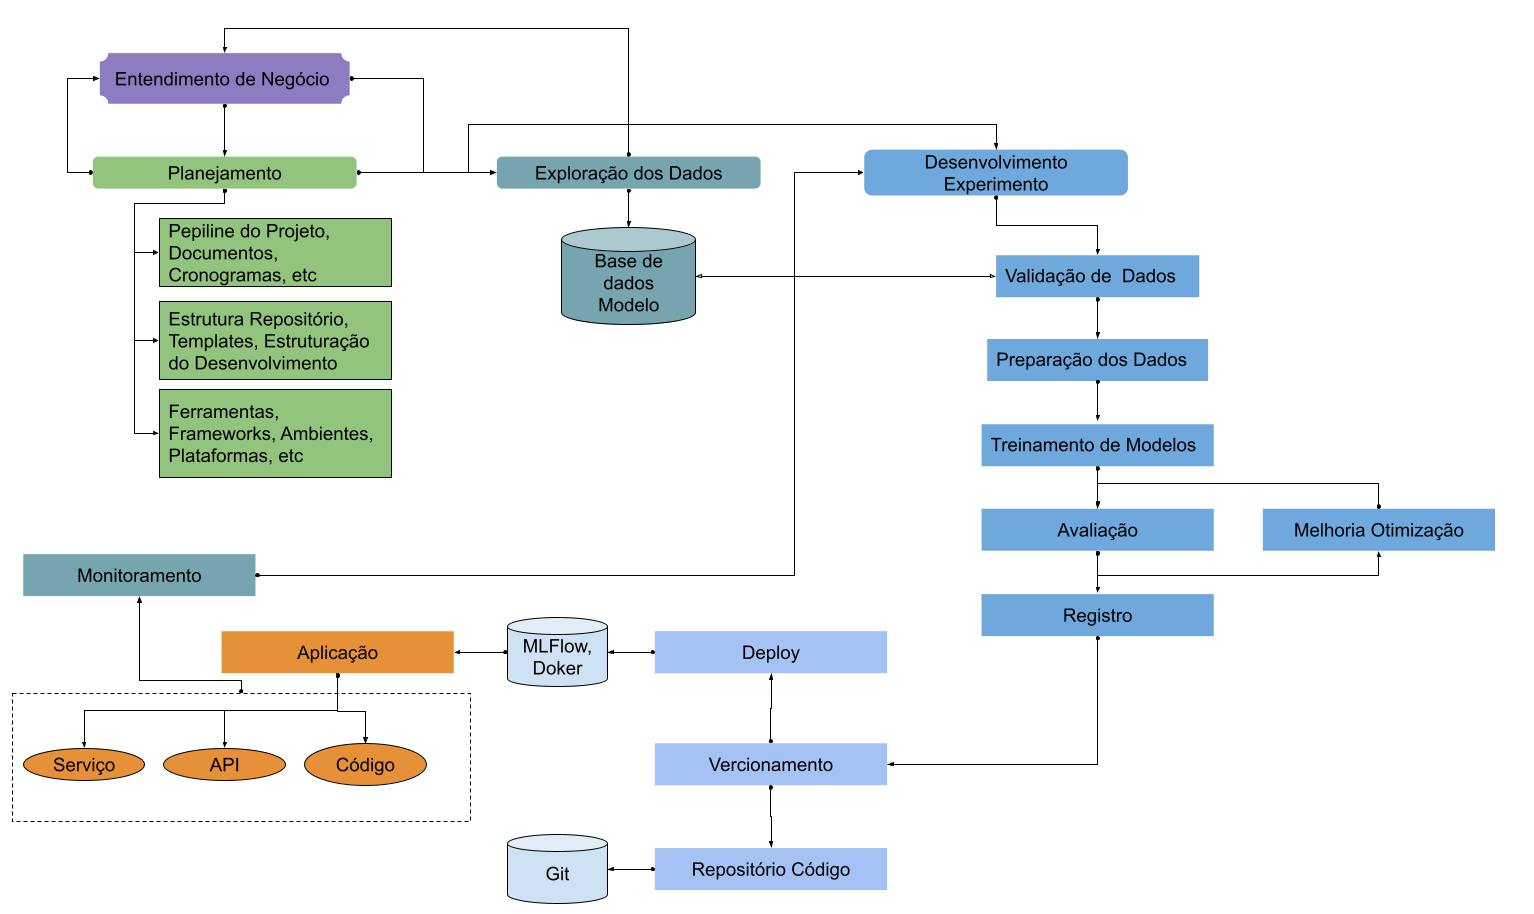

# 3. Pepilines

Assim como em outros processos de desenvolvimento de software os pepilines também são muito importantes no desenvolvimento de aplicações de machine learning. O uso de pepiline, permite a criação de um fluxo de tarefas a serem seguindas que garantem a automatização de todo o processo de desenvolvimento. Como um algoritmo do processo de trabalho, passando por todas as etapas e que podem ser continuas. Os pipelines de ML são definições portáteis e reproduzíveis de fluxos de trabalho.
O diagrama acima demostra as etapas principais para um modelo de machine learning. Os beneficios da utilização
dos pepilines são diversas, entre elas, automação do processo, desenvolvimento agil, continuo e com qualidade, reprodutibilidade e auditabilidade. Então cada etapa do processo pode ser implementado como um pepiline


# 4. Ferramentas

# Exploração dos Dados

Neste topico extra, pode ser incluído ferramentas de exploração de informação, ou seja dados, para alimentar a base de dados do modelo. 

# Pycaret

Nesse processo de Auto ML, uma ferramento muito importante e que tras inumeros beneficios é o Pycaret. PyCaret é uma biblioteca de aprendizado de máquina de código aberto e de baixo código em Python que 
automatiza fluxos de trabalho de aprendizado de máquina (https://pycaret.gitbook.io/docs/). O Pycaret possui funções para os processos
de preparação dos dados, Treinamentos de modelos, ajuste de hiperparâmetros, analise e interpretação, seleção de modelos e gestão de experiemto.
Dessa forma, utilizar essas funções ja desenvolvidas e testadas gera automação do processo de modelagem que será feito a seguir.
Durante o rastreamento dos experimentos serão utilizadas as funções como a Setup()

Comparado com outras bibliotecas de aprendizado de máquina de código aberto, o PyCaret é uma biblioteca alternativa de baixo código que pode ser usada para substituir centenas de linhas de código por apenas algumas linhas. Isso torna os experimentos exponencialmente rápidos e eficientes. O PyCaret é essencialmente um wrapper Python em torno de várias bibliotecas e estruturas de aprendizado de máquina, como scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray e mais alguns. (https://pycaret.gitbook.io/docs/)


O Pycare possui diversas funções, abaixo esta sendo exemplificado algumas funçãoes que em relação as etapas definidas no processo de experiemntação e desenvolvimento de modelos de machine learning.

Rastreio de Experimentos
Setup()
Essa função inicializa o experimento no PyCaret e prepara o pipeline de transformação com base em todos os parâmetros passados na função. A função de configuração deve ser chamada antes de executar qualquer outra função. Requer apenas dois parâmetros: dados e destino. Todos os outros parâmetros são opcionais (https://pycaret.gitbook.io/docs/get-started/functions/initialize#setting-up-environment).


Treinamento:



compare_model()

Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada.
Dessa forma o processo de comparação dentre modelos para escolha do melhor podelo fica automatizada e pratica.

create_model()
Essa função treina e avalia o desempenho de um determinado estimador usando validação cruzada. Facilita o treinamento e a busca utilizando a validação cruzada com avaliação de desempenho.

Monitoramento

plot_model()
Esta função analisa o desempenho de um modelo treinado no conjunto hold-out. 

Atualização
calibrate_model()
optimize_threshold

tune_model()
Esta função ajusta os hiperparâmetros do modelo

Provisionamento(Deployment)

Funções como save_model()

Essa função salva o pipeline de transformação e um objeto de modelo treinado no diretório de trabalho atual como um arquivo pickle para uso posterior.

deploy_model()

Essa função implanta todo o pipeline de ML na nuvem.

https://pycaret.gitbook.io/docs/get-started/functions/train

# MLFLOW

Para realizar o gerenciamento do ciclo de vida deste projeto de machine learning, será utilizado o MLFLOW. Conforme a descrição do site "O MLflow é uma plataforma de código aberto para gerenciar o ciclo de vida do ML, incluindo experimentação, reprodutibilidade, implantação e um registro de modelo central. Atualmente, o MLflow oferece quatro componentes: " https://mlflow.org/
- MLflow Tracking

Gravar e consultar experimentos: código, dados, configuração e resultados.

Na etapa de preparção dos dados, são utilizadas algumas funções como log_param e log_metric para gerar o log de parametros, seleção e features e de metricas, que são os tamanhos das bases, dados nulos e etc.

Também as metricas e parametros nos processos de treino e teste dos modelos.

No monitoramento da saúde do modelo, durante a operação, será comparado resultados dos experiementos que geraram o registro do modelo, com os de operação para identificação se a performance do modelo esta se mantendo.


- MLflow Projects

Empacote o código de ciência de dados em um formato para reproduzir execuções em qualquer plataforma.

Permite o monitoramento do modelo e revalidações em outros ambientes.


- MLflow Models

Implanta modelos de aprendizado de máquina em diversos ambientes de atendimento.

Esses pacotes vão ajudar criar um servidor de aplicação do modelo
para requisições Http, via JSON, por exemplo, entre outros formatos possívels.

- Model Registry


Armazena gerencie modelos em um repositório central

Esses pacotes setão utilizados para colocar o modelo em Staging\Produção


Set up do MLFlow Server, executado no notebook MFLOWSetup

# Streamlit

O Streamlit é uma biblioteca Python de código aberto que facilita a criação e o compartilhamento de aplicativos da Web personalizados e bonitos para aprendizado de máquina e ciência de dados. Em apenas alguns minutos, você pode criar e implantar aplicativos de dados poderosos https://docs.streamlit.io/

Todas as etapas do processo podem ser disponibilizados como indicadores visuais no stremlit, através principalmente da criação de graficos interativos.

Experiment Tracking. Pode ser utilizados vizualizações dessa estapa, por exemplo, informações sobre os dados, e sobre os tratamentos utilizados.

Treino e Teste. Pode ser disponibilizado graficos e para monitoramento dessa etapa, até mesmo aproveitamento os proprios artefatos gerados pelo MLFlow.

Monitoramento da saúde. Esse passo será implementado realizando a comparação de metricas do registro com de operação
com visualização dentro do Streamlit

Atualização do modelo. Pode ser comparado com os processos de registros anteriores e gerar visualizações no Streamlit..

e No Deployment podem ser gerados visualizações de metricas relacionadas as versões entre outras.

# Sklearn

No projeto será utilizada a biblioteca SKlearn que possui diversas funções de código de machine learning prontas para a utilização. Essas funções são utilizadas também dentro do Pycaret, conforme consta na propria descrição do pycaret. Também
existem outras bibliotecas que além do sklearn.

Experiment Tracking por exemplo, funções de tratamento de dados e metricas do sklearn serão utilizadas em conjunto com pycaret e mlflow.
Treinamento. As funções utilizadas pelo pycaret serão as do sklearn para treino e teste, como Regressão Logistica e Arvore de decisão.
Monitoramento da Saúde do Modelo. Funções de metricas do sklearn principamente, no nosso caso, principalmente o Log Loss e o F1, mas diversas outras serão registradas nos MFlow.
Atualização do Modelo, Entra novamente funções de treino teste e metricas utilizadas dentro do pycaret, por exemplo.
Deployment. Os algoritmos da bibllioteca treinados e prontos para uso nas diversas formas de aplicaçõe possíveis.

# 5. Artefatos

Aqui está sendo definido o experimento para log dentro do MLFlow, os dados do experimento serão armazenados no banco mlruns.db,
e será utilizado o SQLite como banco de dados. O experimento foi definido como 'Kobe_Bryant_Shot_Experiment', o banco esta hospedado na pasta Code, conforme os exemplos vistos. Os artefatos estão definidos para o diretório ./mlruns a partir da pasta Code.

Esta arquitetura esta representada no Cenário 02 da documentação do MLFlow https://www.mlflow.org/docs/latest/tracking.html#scenario-2-mlflow-on-localhost-with-sqlite. Onde os artefatos são armazenados na pasta mlruns e as entidades no SQL Lite


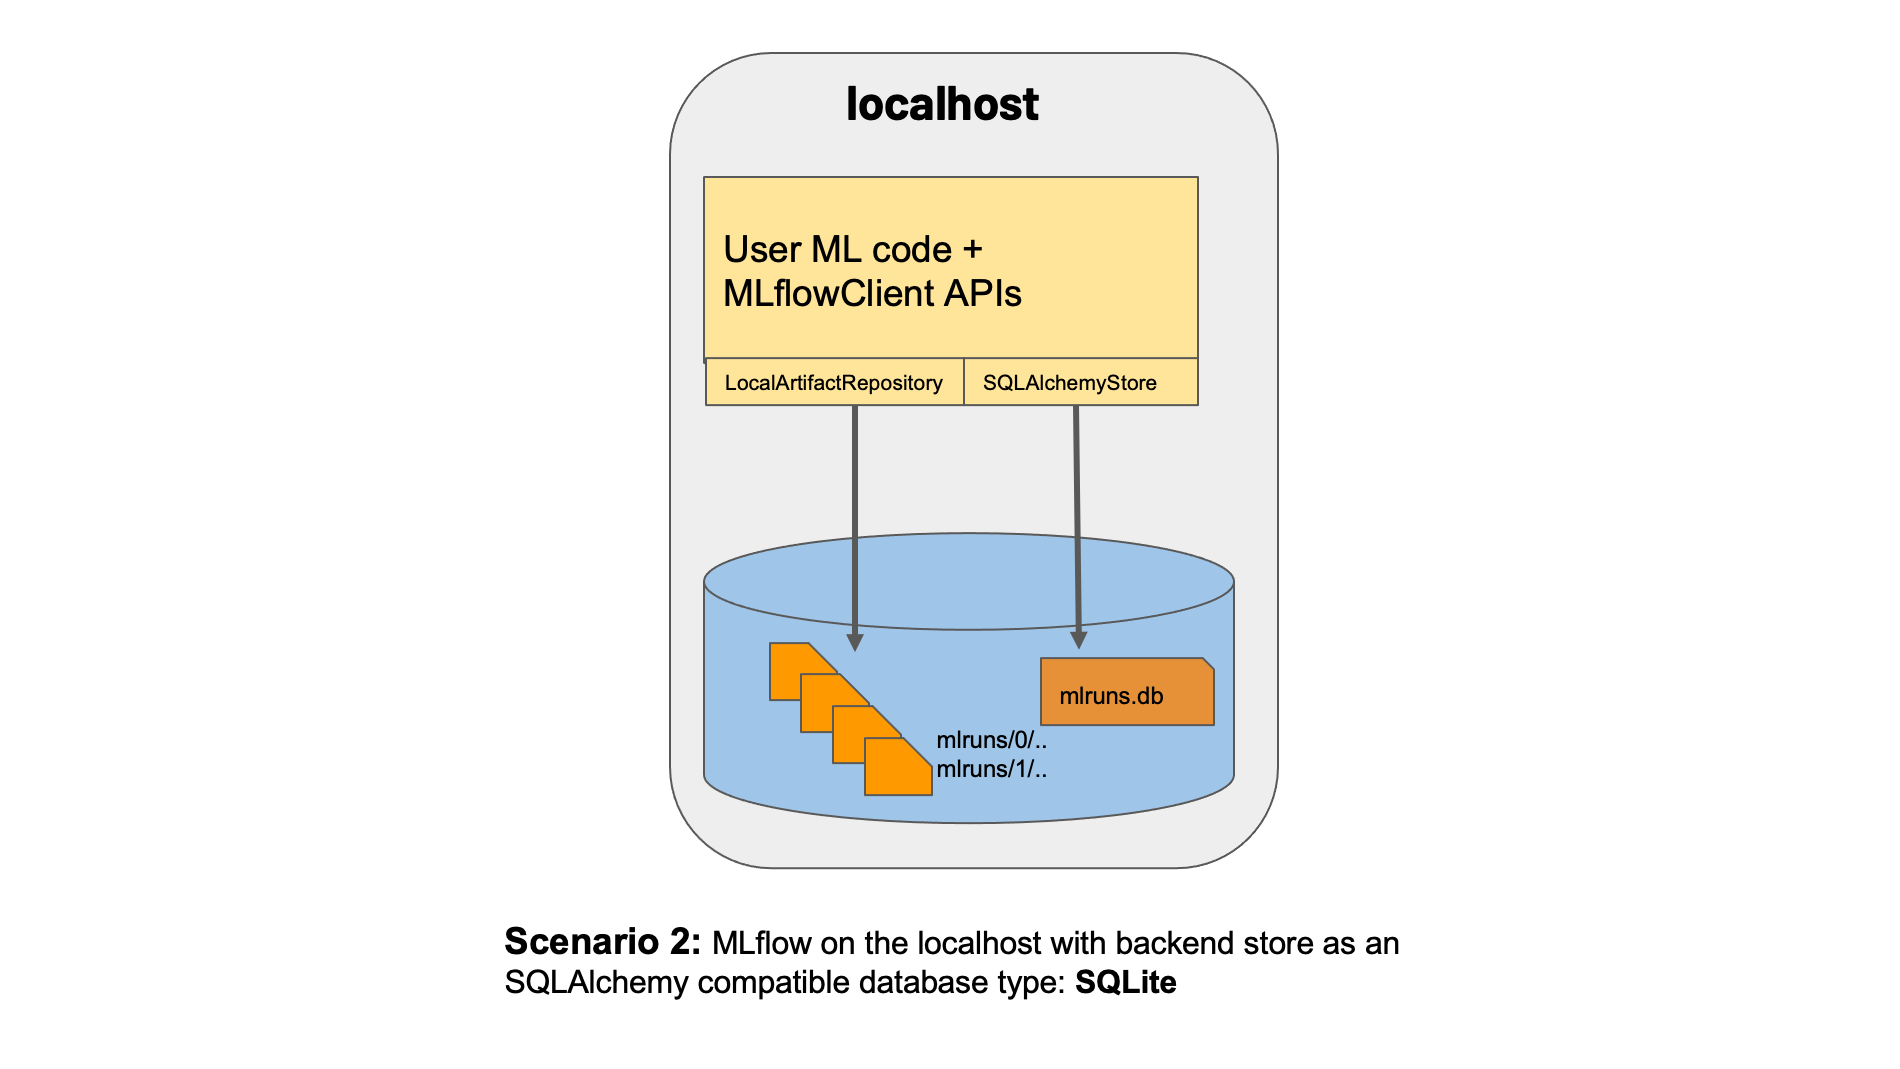

In [85]:
#!mlflow server --backend-store-uri sqlite:///mlruns.db --default-artifact-root ./mlruns --host 127.0.0.1

Caso fosse definido um diretório para o armazenamento do banco e artefatos a patir na pasta dos notebook, será preciso incluir 
sqlite:///./mydirectory/mlruns.db no comando. Existem diversos outros cenários que podem ser utilizados na documentação do MLFlow.

PreparacaoDados:

São gerados alguns artefatos, a base  ../Data/Processed/data_filtered.parquet, ../Data/Operalization/base_train_test.parquet' e '../Data/Operalization/base_operation.parquet'. Ambas descritas na etapa abaixo. O objetivo é guardar os dados após a realização 
da seleção de features, e do tratamento de dados nulos por exemplo. Esses arquivos estão disponíveis para ser lidos nessas pastas por exemplo, pelo streamlit ou por outras ferramentos, e no decorrer dos experimentos podem ser ligos, não ficando salvos apenas em tempo de execução do kernel do jupyter.

Treinamento:

Durante o treinamento são gerados um artefato Transformation Pipeline.pkl contendo as informações da execução. e são logados parâmetros resultantes da analise feita e tags.

Durante a criação do modelo são gerados artefatos MLmodel, condayaml, model.pkl, requiriments.etx, alem de imagens dos plot das metricas (extra). Esses artefatos servem para caso preciso realizar a utilização do modelo, por exemplo como Python

In [86]:
# Para usar o sqlite como repositorio

mlflow.set_tracking_uri("sqlite:///mlruns.db")

experiment_name = 'Kobe_Bryant_Shot_Experiment'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

# 6. PreparacaoDados

A preparação dos dados é um passo importante no processo de Auto ML, nesta etapa será carregado o tratado os dados para os processos 

seguintes. Os dados são carregados do arquivo ../Data/kobe_dataset.csv que veio do site kaggle, o tamanho inicial foi registrado
com o nome Tamanho/Linhas - Base Entrada. 
A variável alvo 'shot_made_flag' está com dados faltantes, a quantidade de linhas foi registrado como Quantidade de shot_made_flag Faltante

O tamanho resultante da remoção dos dados faltantes foi registrado como Tamanho/Linhas - Base sem dados faltantes.
Posteriormente foi filtrada para somente os dados com arremeços de 2 pontos 2PT Field Goal e salvo em ../Data/Processed/data_filtered.parquet

Essa base foi separada em treino/teste 80% e 20% para operação. Registrados os tamanhos no MLFlow como Tamanho/Linhas - Base Treino/Teste e Tamanho/Linhas - Base Operação, respectivamente. Salvos em '../Data/Operalization/base_train_test.parquet' e
'../Data/Operalization/base_operation.parquet'

Os dados com arremeços de 3 pontos 3PT Field Goal, registrado o tamanho Tamanho/Linhas - Base Novidade
e armazenado em '../Data/Operalization/base_novelty.parquet'.


Name	Value
Quantidade de shot_made_flag Faltante	5000

Tamanho/Linhas - Base Entrada	30697

Tamanho/Linhas - Base Novidade	5412

Tamanho/Linhas - Base Operação	4057

Tamanho/Linhas - Base Treino/Teste	16228

Tamanho/Linhas - Base sem dados faltantes	25697


Essa separação dos dados treino/teste foi feita utilizando shuffle=True para que seja feito de forma aleatória, e o parâmetro stratify array como default, garantido que seja aleatória e estratificada. Aleatória que os dados serão misturados, e o estratificado garante a proporcionalidade das amostras. Essa técnica evita que os dados sejam divididos de forma a não expressão
a real exencia da informação. Por exemplo, se todos os dados de cesta convertidos estivessem no inicio do dataset ou os erros no final, uma divisão mantendo essa ordenação, iria disponibilizar para o modelo, informação agrupopada com uma tendência predominando, diferente dos dados totais. Dessa forma a modelagem ficaria prejudidada, assim como a validação com os dados de teste. Assim, a aleatóriedade e a manutenção das proporcionalizade na divisão dos dados, garante que o modelo esta recebendo a informação coerênte a totalizadade dos dados.    

In [98]:
# COLOCAR RUN DE LEITURA DE DADOS
# PARAMETROS: top_features,
# METRICS: SHAPE de cada base de dados
# ARTIFACTS: nenhum

import warnings
warnings.filterwarnings('ignore')
top_features = ['lat','lon', 'minutes_remaining' , 'period', 'playoffs', 'shot_distance']
target_col = 'shot_made_flag'
target_col_label = 'shot_made_label'

with mlflow.start_run(experiment_id=experiment_id, run_name = 'PreparacaoDados', nested=True):
    
    #Leitura de dados
    path_kb_data_input= '../Data/kobe_dataset.csv'
    df_kb_all = pd.read_csv(path_kb_data_input)
    mlflow.log_metric("Tamanho/Linhas - Base Entrada", df_kb_all.shape[0])
    
    #Descrição Variável alvo
    mapa ={0 : 'Errou', 1 : 'Cesta'}
    df_kb_all['shot_made_label'] = pd.DataFrame(df_kb_all [target_col].map(mapa))
    df_kb_all[[target_col, target_col_label]]
    
    
    #Remoção de dados Faltantes na Shot_made_Flag
    mlflow.log_metric("Quantidade de {} Faltante".format(target_col), df_kb_all['shot_made_flag'].isnull().sum())
    df_kb = df_kb_all[df_kb_all['shot_made_flag'].notnull()].reset_index()
    df_kb[target_col] = df_kb[target_col].astype(int)
    mlflow.log_metric("Tamanho/Linhas - Base sem dados faltantes", df_kb.shape[0])
    
    
    #Seleção de Features
    df_kb_tf = df_kb [top_features + ['shot_type', target_col]].copy()
    mlflow.log_param("top_features", top_features)
    
    #Filtro 2PT Field Goal
    
    df_kb_2PT = df_kb_tf[df_kb_tf['shot_type'] == '2PT Field Goal'].copy().drop('shot_type', axis=1)
    df_kb_2PT.to_parquet('../Data/Processed/data_filtered.parquet')
    
    
    # Separação da base com 80%/20% test_size=0.2
    #stratifyarray-like, default=None If not None, data is split in a stratified fashion, using this as the class labels.
    #shuffle = True
    df_kb_tt, df_kb_operation, ytrain, ytest = model_selection.train_test_split(df_kb_2PT, 
                                                                            df_kb_2PT[target_col],
                                                                            test_size=0.2,
                                                                            shuffle=True)
    
    mlflow.log_param("Percentual Operação", '0.2')
    df_kb_tt[target_col]      = ytrain
    df_kb_operation[target_col] = ytest
    
    
    mlflow.log_metric("Tamanho/Linhas - Base Treino/Teste", df_kb_tt.shape[0])
    mlflow.log_metric("Tamanho/Linhas - Base Operação", df_kb_operation.shape[0])
    
    
    #Base  3PT Field Goal
    df_kb_novelty = df_kb[df_kb['shot_type'] == '3PT Field Goal'].copy().drop('shot_type', axis=1)
    mlflow.log_metric("Tamanho/Linhas - Base Novidade", df_kb_novelty.shape[0]) 
    
    #Envio datasets para "/Data/operalization/base_{train|test}.parquet
    df_kb_tt.to_parquet('../Data/Operalization/base_train_test.parquet')
    df_kb_operation.to_parquet('../Data/Operalization/base_operation.parquet')
    df_kb_novelty.to_parquet('../Data/Operalization/base_novelty.parquet')
    
#label_map = df_wine[['target', 'target_label']].drop_duplicates()
#drop_cols = ['target_label']
#df_wine.drop(drop_cols, axis=1, inplace=True)
#print(df_kb.shape)

#df_kb.head()
#df_kb.keys()
    
    
mlflow.end_run()

# 7.Treinamento

Essa função inicializa o experimento no PyCaret e cria o pipeline de transformação com base em todos os parâmetros passados ​​na função. A função de configuração deve ser chamada antes de executar qualquer outra função. São necessários dois parâmetros obrigatórios: data e destino. Todos os outros parâmetros são opcionais. https://pycaret.gitbook.io/docs/get-started/functions/initialize#setting-up-environment.

Neste caso os parâmetros obrigatórios são df_kb_tt (base de dados) e o nome da coluna da váriável alvo.

Os parâmetros para gerar os logs do experimento no MLFLOW.

    - log_experiment = True, 
    - experiment_name = experiment_name, 
    - log_plots = True


As metricas default do Pycaret são: 'Accuracy' 'AUC', 'Recall', 'Precision', 'F1', 'Kappa', 'MCC'. Porém será adicionado também
a Metrica Perda de Log

Perda de log, também conhecida como perda logística ou perda de entropia cruzada.

Esta é a função de perda usada na regressão logística (multinomial) e em suas extensões, como redes neurais, definida como a probabilidade logarítmica negativa de um modelo logístico que retorna probabilidades y_pred para seus dados de treinamento y_true. A perda de log é definida apenas para dois ou mais rótulos
Adicionando Metric Loss Log. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

# 7a - Regressão Logistica

In [100]:
#import pycaret.classification as pc
# COLOCAR RUN DE TREINAMENTO DE MODELOS
# PARAMETROS: fold_strategy, fold, model_name, registered_model_name, cross_validation
# METRICS: auto sklearn
# ARTIFACTS: plots
# add Log Loss metric in pycaret
import pycaret.classification as pc
from sklearn.metrics import log_loss

registered_model_name = 'modelo_regressão_kb'
model_name = 'lr'
probability_threshold = 0.5
cross_validation = True
fold_strategy = 'stratifiedkfold',
fold = 10
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento', nested=True):
    # train/test
    s = pc.setup(data = df_kb_tt, 
                 target = target_col,
                 train_size=0.7,
                 silent = True,
                 fold_strategy = 'stratifiedkfold',
                 fold = fold,
                 log_experiment = True, 
                 experiment_name = experiment_name, 
                 log_plots = True
                )
    pc.add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False)
    bestmodel = pc.create_model(model_name,
                                cross_validation = cross_validation,
                                probability_threshold=probability_threshold)

    # Log do run, e nao do modelo respectivo
    classification_plots = [ 'auc','pr','confusion_matrix',
                          #'error', 'class_report', 
                        'threshold', 'f1', 'logloss',
                         'learning','vc','feature',
                       ]
    for plot_type in classification_plots:
        print('=> Aplicando plot ', plot_type)
        try:
            artifact = pc.plot_model(bestmodel, plot=plot_type, save=True, use_train_data=False)
            mlflow.log_artifact(artifact)
        except:
            print('=> Nao possivel plotar: ', plot_type )
            continue

    #pc.save_model(bestmodel, f'./{registered_model_name}') 
    # Carrega novamente o pipeline + bestmodel
    #model_pipe = pc.load_model(f'./{registered_model_name}')


mlflow.end_run()

INFO:logs:Saving 'Feature Importance.png'
INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [101]:
pc.get_metrics() 

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001C584FC16A8>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000001C584FB8048>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001C58CED3...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001C58D35C...,make_scorer(matthews_corrcoef),pred,{},True,True,False
logloss,LogLoss,LogLoss,<function log_loss at 0x000001C58CEE50D0>,"make_scorer(log_loss, greater_is_better=False)",pred,{},False,True,True


In [102]:
pred_holdout = pc.predict_model(bestmodel)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(drift_kwargs=None, display=None, ml_usecase=MLUsecase.CLASSIFICATION, verbose=True, round=4, raw_score=False, drift_report=False, encoded_labels=False, probability_threshold=None, estimator=CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                   

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Logistic Regression,0.5833,0.6025,0.4950,0.5698,0.5298,0.1589,0.1602,14.3931


# 7C - Arvore de Decisão

In [103]:
import pycaret.classification as pc
# COLOCAR RUN DE TREINAMENTO DE MODELOS
# PARAMETROS: fold_strategy, fold, model_name, registered_model_name, cross_validation
# METRICS: auto sklearn
# ARTIFACTS: plots
# add Log Loss metric in pycaret




registered_model_name = 'modelo_arvore_kb'
model_name = 'dt'
probability_threshold = 0.5
cross_validation = True
fold_strategy = 'stratifiedkfold',
fold = 10
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento', nested=True):
    # train/test
    s = pc.setup(data = df_kb_tt, 
                 target = target_col,
                 train_size=0.7,
                 silent = True,
                 fold_strategy = 'stratifiedkfold',
                 fold = fold,
                 log_experiment = True, 
                 experiment_name = experiment_name, 
                 log_plots = True
                )
    pc.add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False)
    bestmodel = pc.create_model(model_name,
                                cross_validation = cross_validation, 
                                probability_threshold=probability_threshold)

    # Log do run, e nao do modelo respectivo
    #classification_plots = [ 'f1','logloss']
   # for plot_type in classification_plots:
       # print('=> Aplicando plot ', plot_type)
       # try:
        #    artifact = pc.plot_model(bestmodel, plot=plot_type, save=True, use_train_data=False)
        #    mlflow.log_artifact(artifact)
        #except:
         #   print('=> Nao possivel plotar: ', plot_type )
         #   continue

    #pc.save_model(bestmodel, f'./{registered_model_name}') 
    # Carrega novamente o pipeline + bestmodel
    #model_pipe = pc.load_model(f'./{registered_model_name}')


mlflow.end_run()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.5449,0.5110,0.6018,0.5262,0.5615,0.0929,0.0938,15.7190
1,0.5502,0.5328,0.6400,0.5293,0.5794,0.1052,0.1074,15.5366
2,0.5458,0.5130,0.6055,0.5269,0.5635,0.0948,0.0958,15.6886
3,0.5414,0.5211,0.5982,0.5231,0.5581,0.0859,0.0867,15.8406
4,0.5387,0.5226,0.6091,0.5202,0.5611,0.0814,0.0825,15.9318
5,0.5387,0.5174,0.5836,0.5211,0.5506,0.0799,0.0805,15.9318
6,0.5511,0.5317,0.6055,0.5319,0.5663,0.1050,0.1060,15.5062
7,0.5326,0.5114,0.6036,0.5147,0.5556,0.0691,0.0701,16.1447
8,0.5326,0.5059,0.5855,0.5152,0.5481,0.0681,0.0687,16.1447


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:CustomProbabilityThresholdClassifier(ccp_alpha=0.0, class_weight=None,
                                     classifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=None,
                                                                       max_features=None,
                                                                       max_leaf_nodes=None,
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                                                                       min_samples_leaf=

# 7C. Escolha Livre

Uma forma de realização de uma escolha para um algoritmo seria utilizar o função compare_models do Pycaret. O sort define o parâmetro de ordenação, nesse caso foi utilizado o Log Loss. Para a escolha do moelhor modelo, pode ser utilizada a função compare_models, e neste caso o melhor resultado foi o Gradient Boosting Classifier e Ada Boost Classifier. Então seria escolhido o Gradient Boosting Classifier

In [104]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Compare', nested=True):
    best_model = pc.compare_models(n_select = 1, sort='logloss')
    mlflow.autolog()
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
gbc,Gradient Boosting Classifier,0.5902,0.6028,0.4124,0.6145,0.4934,0.1712,0.1809,14.1543,0.2560
ada,Ada Boost Classifier,0.5898,0.5994,0.3917,0.6210,0.4802,0.1692,0.1816,14.1695,0.1080
lda,Linear Discriminant Analysis,0.5787,0.5981,0.5046,0.5738,0.5369,0.1533,0.1544,14.5527,0.0440
lr,Logistic Regression,0.5786,0.5974,0.5030,0.5739,0.5361,0.1531,0.1542,14.5557,0.0950
ridge,Ridge Classifier,0.5783,0.0000,0.5037,0.5735,0.5363,0.1526,0.1537,14.5649,0.0320
lightgbm,Light Gradient Boosting Machine,0.5752,0.5930,0.4968,0.5703,0.5310,0.1462,0.1474,14.6713,0.0660
nb,Naive Bayes,0.5528,0.5835,0.4721,0.5583,0.4747,0.1012,0.1022,15.4466,0.0330
rf,Random Forest Classifier,0.5526,0.5607,0.5466,0.5373,0.5418,0.1048,0.1048,15.4528,0.3770
et,Extra Trees Classifier,0.5467,0.5487,0.5610,0.5301,0.5451,0.0941,0.0943,15.6565,0.3980
dt,Decision Tree Classifier,0.5398,0.5185,0.5954,0.5216,0.5560,0.0827,0.0836,15.8937,0.0500


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=879, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................
2022/04/17 17:15:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/04

In [105]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=879, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Tune', nested=True):
    tuned_model = pc.tune_model(best_model,
                            optimize = 'logloss',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 4)
mlflow.end_run()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.5968,0.6183,0.3182,0.6783,0.4332,0.1795,0.2106,13.9250
1,0.5827,0.5921,0.3418,0.6267,0.4424,0.1528,0.1708,14.4115
2,0.6118,0.6334,0.3655,0.6860,0.4769,0.2115,0.2381,13.4082
3,0.6153,0.6257,0.3600,0.6996,0.4754,0.2182,0.2484,13.2865
4,0.5845,0.5870,0.3345,0.6345,0.4381,0.1559,0.1761,14.3507
5,0.5933,0.6015,0.3236,0.6642,0.4352,0.1728,0.2002,14.0466
6,0.5731,0.5783,0.2691,0.6407,0.3790,0.1298,0.1583,14.7459
7,0.5731,0.5934,0.3164,0.6148,0.4178,0.1323,0.1506,14.7459
8,0.5827,0.5950,0.3236,0.6357,0.4289,0.1519,0.1734,14.4115


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=879, subsample=0.55, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


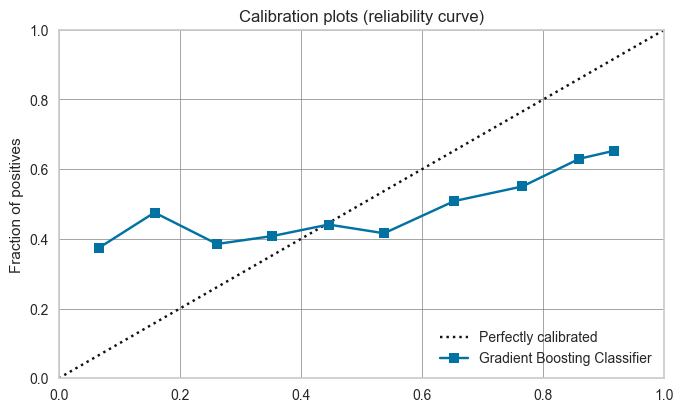

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
with mlflow.start_run(experiment_id=experiment_id, run_name = 'Evaluate Tuned', nested=True):
    calibrated_model = pc.calibrate_model(tuned_model, method='sigmoid', calibrate_fold=5, fold=5)
    pc.plot_model(calibrated_model, plot='calibration')
mlflow.end_run()

In [108]:
pc.optimize_threshold(calibrated_model, optimize = 'logloss');

INFO:logs:Initializing optimize_threshold()
INFO:logs:optimize_threshold(plot_kwargs=None, return_data=False, grid_interval=0.1, optimize=logloss, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                 max_features=1.0,
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=0.01,
                                                                 min_impurity_split=None,


INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:CustomProbabilityThresholdClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                               criterion='friedman_mse',
                                                                       

INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(kwargs={}, return_train_score=False, display=None, probability_threshold=0.30000000000000004, add_to_model_list=True, experiment_custom_tags=None, metrics=None, system=False, verbose=False, refit=True, groups=None, fit_kwargs=None, predict=True, cross_validation=True, round=4, fold=None, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                

INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:CustomProbabilityThresholdClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                               criterion='friedman_mse',
                                                                       

INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(kwargs={}, return_train_score=False, display=None, probability_threshold=0.6000000000000001, add_to_model_list=True, experiment_custom_tags=None, metrics=None, system=False, verbose=False, refit=True, groups=None, fit_kwargs=None, predict=True, cross_validation=True, round=4, fold=None, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                 

INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:CustomProbabilityThresholdClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                               criterion='friedman_mse',
                                                                      

INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(kwargs={}, return_train_score=False, display=None, probability_threshold=0.9, add_to_model_list=True, experiment_custom_tags=None, metrics=None, system=False, verbose=False, refit=True, groups=None, fit_kwargs=None, predict=True, cross_validation=True, round=4, fold=None, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                 max_features=1.

INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:CustomProbabilityThresholdClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                               criterion='friedman_mse',
                                                                      

INFO:logs:returning model with best metric
INFO:logs:optimize_threshold() succesfully completed......................................


In [109]:
pred_holdout = pc.predict_model(calibrated_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(drift_kwargs=None, display=None, ml_usecase=MLUsecase.CLASSIFICATION, verbose=True, round=4, raw_score=False, drift_report=False, encoded_labels=False, probability_threshold=None, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                 max_features=1.0,
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Gradient Boosting Classifier,0.5909,0.6052,0.3702,0.6017,0.4584,0.1587,0.1708,14.1306


In [110]:
pred_holdout

,lat,lon,shot_distance,minutes_remaining_0,minutes_remaining_1,minutes_remaining_10,minutes_remaining_11,minutes_remaining_2,minutes_remaining_3,minutes_remaining_4,...,period_2,period_3,period_4,period_5,period_6,period_7,playoffs_1,shot_made_flag,Label,Score
0,34.044300,-118.269798,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0.5868
1,34.029301,-118.315804,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5502
2,34.027302,-118.292801,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5385
3,34.034302,-118.113800,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.6219
4,33.891300,-118.414803,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,34.065300,-118.404800,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6707
4865,33.875301,-118.381798,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5962
4866,33.883301,-118.298798,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5464
4867,33.948299,-118.448799,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.5934


In [111]:
def eval_metrics(actual, pred):
    return ({'Prec.': metrics.precision_score(actual, pred), 
             'Recall':metrics.recall_score(actual, pred),
             'F1':metrics.f1_score(actual, pred),
             'LogLoss':metrics.log_loss(actual, pred),
             'AUC':metrics.roc_auc_score(actual, pred),
             'Accuracy':metrics.accuracy_score(actual, pred),
             'Kappa':metrics.cohen_kappa_score(actual, pred),
             'MCC':metrics.matthews_corrcoef(actual, pred)})
            


Otimização dos hiperparâmetros

# 8 Registro do Modelo

In [115]:
from mlflow.tracking import MlflowClient
import mlflow
import warnings
warnings.filterwarnings('ignore')
#mlflow.set_registry_uri("sqlite:///mlruns.db")
#from mlflow.models.signature import infer_signature
from sklearn import tree, preprocessing, metrics, model_selection
#from mlflow.models.signature import ModelSignature

model_version = -1 
registered_model_name = 'Modelo Kobe Bryant'

with mlflow.start_run(experiment_id=experiment_id, run_name = 'RegistroModelo', nested=True):
    pred_holdout = pc.predict_model(calibrated_model)
    mr=metrics.precision_score(pred_holdout[target_col], pred_holdout['Label'])
    # Test set
    #pred_holdout = pc.predict_model(model_to_registre)
    #pr = metrics.precision_score(pred_holdout[target_col], pred_holdout['Label'])
    #if pr > min_precision:
       # print(f'=> Aceito o modelo com precisão {pr} (min: {min_precision})')
        # Pycaret exporta junto o pipeline de preprocessamento
    pc.save_model(model_to_registre, f'./{registered_model_name}') 
        # Carrega novamente o pipeline + bestmodel
    model_pipe = pc.load_model(f'./{registered_model_name}')
        # Assinatura do Modelo Inferida pelo MLFlow
    model_features = list(df_kb_tt.drop(target_col, axis=1).columns)
        #inf_signature = infer_signature(DataBin[model_features], model_pipe.predict(DataBin))
        # Exemplo de entrada para o MLmodel
        #input_example = {x: DataBin[x].values[:nexamples] for x in model_features}
        # Log do pipeline de modelagem do sklearn e registrar como uma nova versao
    mlflow.sklearn.log_model(
        sk_model=model_pipe,
        artifact_path="sklearn-model",
        registered_model_name=registered_model_name,
            #signature = inf_signature,
            #input_example = input_example
        )
        # Criacao do cliente do servico MLFlow e atualizacao versao modelo
    client = MlflowClient()
    if model_version == -1:
        model_version = client.get_latest_versions(registered_model_name)[-1].version
        # Registrar o modelo como staging
    client.transition_model_version_stage(
        name=registered_model_name,
        version=model_version, # Verificar com usuario qual versao
        stage="Staging"
    )
    result= eval_metrics(pred_holdout[target_col].values, pred_holdout['Label'].values)
    result_title=''
    result_value=''
    for metric in result.keys():    
        mlflow.log_metric(metric, result[metric])
        print('{:<8}\t{:0.2f}'.format(metric, result[metric]))

    mlflow.log_metric('Version', model_version)
#else:
    #print(f'=> Rejeitado o modelo com precisão {pr} (min: {min_precision})')

mlflow.end_run()


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(drift_kwargs=None, display=None, ml_usecase=MLUsecase.CLASSIFICATION, verbose=True, round=4, raw_score=False, drift_report=False, encoded_labels=False, probability_threshold=None, estimator=CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=1,
                                                                 max_features=1.0,
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Gradient Boosting Classifier,0.5909,0.6052,0.3702,0.6017,0.4584,0.1587,0.1708,14.1306


INFO:logs:Initializing save_model()
INFO:logs:save_model(kwargs={}, verbose=True, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='shot_made_flag',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
      

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Registered model 'Modelo Kobe Bryant' already exists. Creating a new version of this model...
2022/04/17 17:44:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Modelo Kobe Bryant, version 8


Prec.   	0.60
Recall  	0.37
F1      	0.46
LogLoss 	14.13
AUC     	0.58
Accuracy	0.59
Kappa   	0.16
MCC     	0.17


Created version '8' of model 'Modelo Kobe Bryant'.


Ativando o serviço Server para o modelo Modelo Kobe Bryant em Staging, execução em outro notebook

In [39]:
#import os
#os.environ['MLFLOW_TRACKING_URI'] = 'sqlite:///mlruns.db'

#!mlflow models serve -m "models:/modelo_cancer/Staging" --no-conda -p 5001

# 8.1 Revalidação

Para a revalidação será feito utilizando os dados com 3PT Field Goal, que são diferentes porque o acerremeço de 3 pontos é mais
distânte do de 2 pontos. Dessa forma representa um novo conjunto de dados com caracteristicas, digamos que não esperadas pelo modelo,
que foi treinado com dados de arremeços de 2pts.

Abaixo esta uma função para calculo das principais metricas e retorno em formato dicionário.

O Serviço vai enviar uma request http para o serviço da API que realiza a predição e retorna os valores preditos em um JSON que é 
convertido para DataFrame e então são calculadas as metricas. Tudas as metricas são então salvas como log metric no MLFLow

In [117]:
import pandas as pd
import requests
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc


#Configuração do request
host = 'localhost'
port = '5001'
url = f'http://{host}:{port}/invocations'
headers = {'Content-Type': 'application/json',}

with mlflow.start_run(experiment_id=experiment_id, run_name = 'RevalidaçãoModelo', nested=True):
    #Dados para revalidação
    df_kb_op=pd.read_parquet('../Data/Operalization/base_operation.parquet')
    http_data = df_kb_op.drop(target_col,axis=1).to_json(orient='split')
    r = requests.post(url=url, headers=headers, data=http_data)
    df_kb_op.loc[:, 'operation_label'] = pd.read_json(r.text).values[:,0]

    #ll = log_loss(df_kb_op[target_col], df_kb_op['operation_label'])
    #f1 = f1_score(df_kb_op[target_col], df_kb_op['operation_label'])
    #acc= accuracy_score(df_kb_op[target_col], df_kb_op['operation_label'])
    #auc=auc(df_kb_op[target_col], df_kb_op['operation_label'])
    result= eval_metrics(df_kb_op[target_col], df_kb_op['operation_label'])
    result_title=''
    result_value=''
    for metric in result.keys():    
        mlflow.log_metric(metric, result[metric])
        print('{:<8}\t{:0.2f}'.format(metric, result[metric]))

    mlflow.log_metric('Version', model_version)
mlflow.end_run()


Prec.   	0.60
Recall  	0.40
F1      	0.48
LogLoss 	13.97
AUC     	0.58
Accuracy	0.60
Kappa   	0.17
MCC     	0.18


Comparação

# 8.a Aderência com Novo Conjunto de Dados

In [107]:
df_ex = mlflow.search_runs([experiment_id], order_by=["metrics.m DESC"])
df_ex_fh = df_ex[df_ex['status'] == 'FINISHED'].copy()
df_ex_fh_rv = df_ex_fh[df_ex['tags.mlflow.runName'] == 'RevalidaçãoModelo'].copy()
df_ex_fh_rg = df_ex_fh[df_ex['tags.mlflow.runName'] == 'Gradient Boosting Classifier'].copy()
metrics_select = ['tags.mlflow.runName','metrics.LogLoss', 'metrics.F1','metrics.Accuracy', 'metrics.Prec.', 'metrics.Recall']
df_ex_fh_rv_fl=df_ex_fh_rv[metrics_select].copy()
df_ex_fh_rg_fl=df_ex_fh_rg[metrics_select].copy()
#print(df_ex_fh_rv_fl.keys())
df_rs=pd.concat([pd.DataFrame(df_ex_fh_rv_fl.iloc[:1]), df_ex_fh_rg_fl.iloc[:1]], axis=0)
df_rs.to_parquet('../Data/Operalization/results/results01.parquet')
df_rs

,tags.mlflow.runName,metrics.LogLoss,metrics.F1,metrics.Accuracy,metrics.Prec.,metrics.Recall
68,RevalidaçãoModelo,13.834333,0.484291,0.599458,0.617314,0.398433
0,Gradient Boosting Classifier,14.114800,0.439100,0.591300,0.653900,0.331200


# 8b Monitoramento do Modelo

Na comparação entre os resultados obtidos no experimênto de Ada Boost Classifier que foi o melhor modelo escolhido pelo Pycaret
e o RelalidaçãoModelo que foi realizado com os dados de arremeços de 3 pontos. As metricas ficaram muito próximas, significa que 
não houve perca de performace porém fica abaixo dos resultados coletados pelo algoritmo de melhor resultado. O correto séria com 
esses dados novos, realizar uma nova amostra de dados de forma aleatoria e estratificada, unindo os arremeços de 2 e de 3 para gerar uma melhora nos resultados de operação, com intuito de manter as matricas que perderam cairam mais como a Prec. e o Recall e o F1 mais alinhados com os resultados do desenvolvimento. 

# 8c Estrategias Reativa e Preditiva

O monitoramnto do modelo pode ser feito com a variável resposta, como no caso acima, onde foi comparada a operação com os dados 
do desenvolvimento para gerar indicadores, e os indicadores servem para descrever como está a saúde do modelo. Ou no caso de não existir
a variável resposta, deve ser utilizada uma forma de gerar a variável, seja com equipe de especialista na área em questão, ou utilizando
outros algoritmos por exemplo. Mas nesse caso específico a variável resposta existe porque cada arremeço gera uma cesta ou erro.
Num caso por exemplo de tratamento de uma doença, ou ainda  não se saiba, pode ser coletada amostras tem realização de exames onde 
e apoio de especialistas, onde se possa gerar os resultados, e daqui extrair as metricas.

# 9 Streamlit